In [2243]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_train=working_directory+'/train_finance.csv'
path_test=working_directory+'/test_finance.csv'
# path_test=working_directory+'/test_finance_last10elminate.csv'
path_latest=working_directory+'/test_latest.csv'
path_submit=working_directory+'/submit_finance.csv'

#データフレームの生成
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)
df_latest=pd.read_csv(path_latest)
df_submit=pd.read_csv(path_submit)

In [2244]:
# Dateがobject型になっているので日付型に変換
df_train['Date']=pd.to_datetime(df_train['Date'],format='%Y/%m/%d')
df_test['Date']=pd.to_datetime(df_test['Date'],format='%Y/%m/%d')
df_latest['Date']=pd.to_datetime(df_latest['Date'],format='%Y/%m/%d')

In [2245]:
# Dateが日付型に変更されたかどうかの確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2074 non-null   datetime64[ns]
 1   High    2074 non-null   float64       
 2   Low     2074 non-null   float64       
 3   Open    2074 non-null   float64       
 4   Close   2074 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 81.1 KB


In [2246]:
# Dateが日付型に変更されたかどうかの確認
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1246 non-null   datetime64[ns]
 1   High    1246 non-null   float64       
 2   Low     1246 non-null   float64       
 3   Open    1246 non-null   float64       
 4   Close   1246 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 48.8 KB


In [2247]:
#データの確認
df_train.describe()

,High,Low,Open,Close
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.910559,123.526205,123.529490
std,9.210193,9.493319,9.188003,9.184970
min,108.520946,6.743457,107.993884,107.998923
25%,117.002707,115.863246,116.408944,116.427990
50%,123.242134,121.951219,122.590435,122.573382
75%,130.814157,129.393252,130.201913,130.179930
max,148.260942,146.834717,147.832063,147.888796


### Train異常値処理

In [2248]:
# Trainデータ異常値
df_train[(df_train['Low']<10)]
no=df_train[(df_train['Low']<10)].index
# print(f'欠損データ確認(df_train)\n{typeInfo(no)}\n')

In [2249]:
# df_train.iloc[no:no+1] #インデックス指定されてるものでないとilocの範囲指定に使えない
print(f'異常値▲1日\n{df_train.iloc[no-1]}\n')
print(f'異常値当日\n{df_train.iloc[no]}\n')
print(f'異常値+1日\n{df_train.iloc[no+1]}\n')

異常値▲1日
           Date        High         Low        Open       Close
1114 2008-03-14  145.059359  143.736202  144.513188  144.465784

異常値当日
           Date        High       Low        Open       Close
1115 2008-03-17  147.103265  6.743457  145.669288  145.669288

異常値+1日
           Date        High         Low        Open      Close
1116 2008-03-18  146.409411  144.456764  145.660125  144.83676



In [2250]:
# 様々な記法一覧
print(f'1\n{df_train.iloc[no,2]}\n')
print(f'1\n{df_train.iloc[1115].Low}\n')
# print(f'1\n{df_train.at[df_train.index[1115],'Low']}\n')

1
1115    6.743457
Name: Low, dtype: float64

1
6.743457186967135



In [2251]:
ave =(df_train['Low'][1114]+df_train['Low'][1116]) /2
ave

144.09648299217224

In [2252]:
df_train['Low'][1115]=ave
df_train['Low'][1115]

144.09648299217224

In [2253]:
df_train.describe()

,High,Low,Open,Close
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.976785,123.526205,123.529490
std,9.210193,9.155624,9.188003,9.184970
min,108.520946,107.748581,107.993884,107.998923
25%,117.002707,115.876669,116.408944,116.427990
50%,123.242134,121.954434,122.590435,122.573382
75%,130.814157,129.426294,130.201913,130.179930
max,148.260942,146.834717,147.832063,147.888796


In [2254]:
#データの確認
df_test.describe()

,High,Low,Open,Close
count,1246.000000,1246.000000,1246.000000,1246.000000
mean,111.424603,110.675657,111.069958,111.070373
std,9.206534,9.270658,9.215541,9.214999
min,96.767439,70.352906,96.364197,96.357173
25%,103.722807,103.064503,103.422443,103.422154
50%,108.456692,107.796669,108.091687,108.082215
75%,120.690221,119.751722,120.218867,120.219641
max,129.417693,128.691531,128.851618,128.858797


## 単純移動平均の追加

In [2255]:
#　移動平均の期間
span01=6
span02=6
span03=12

In [2256]:
df_train['SMA01']=df_train['Close'].rolling(window=span01).mean()
df_test['SMA01']=df_test['Close'].rolling(window=span01).mean()

# df_train['SMA02']=df_train['Close'].rolling(window=span01).mean()
# df_test['SMA02']=df_test['Close'].rolling(window=span01).mean()

# df_train['SMA03']=df_train['Close'].rolling(window=span01).mean()
# df_test['SMA03']=df_test['Close'].rolling(window=span01).mean()

In [2257]:
# 
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01
0    2003-12-01  111.370639  110.482062  111.314347  110.676377         NaN
1    2003-12-02  112.008532  110.500532  110.639316  111.823016         NaN
2    2003-12-03  112.202814  111.712284  111.832477  112.137524         NaN
3    2003-12-04  112.332259  111.406851  112.110343  111.748717         NaN
4    2003-12-05  112.766375  111.609834  111.721723  112.729259         NaN
...         ...         ...         ...         ...         ...         ...
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395

[2074 rows x 6 columns]

test
           Date        High         Low        Open

In [2258]:
# 移動平均1日目を取り合えす終値で埋める
df_train['SMA01'][0]=df_train['Close'][0]
df_test['SMA01'][0]=df_test['Close'][0]

# df_train['SMA02'][0]=df_train['Close'][0]
# df_test['SMA02'][0]=df_test['Close'][0]

# df_train['SMA03'][0]=df_train['Close'][0]
# df_test['SMA03'][0]=df_test['Close'][0]

In [2259]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01
0    2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377
1    2003-12-02  112.008532  110.500532  110.639316  111.823016         NaN
2    2003-12-03  112.202814  111.712284  111.832477  112.137524         NaN
3    2003-12-04  112.332259  111.406851  112.110343  111.748717         NaN
4    2003-12-05  112.766375  111.609834  111.721723  112.729259         NaN
...         ...         ...         ...         ...         ...         ...
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395

[2074 rows x 6 columns]

test
           Date        High         Low        Open

In [2260]:
#線形補間
df_train=df_train.interpolate()
df_test=df_test.interpolate()

In [2261]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01
0    2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377
1    2003-12-02  112.008532  110.500532  110.639316  111.823016  110.946101
2    2003-12-03  112.202814  111.712284  111.832477  112.137524  111.215825
3    2003-12-04  112.332259  111.406851  112.110343  111.748717  111.485549
4    2003-12-05  112.766375  111.609834  111.721723  112.729259  111.755273
...         ...         ...         ...         ...         ...         ...
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395

[2074 rows x 6 columns]

test
           Date        High         Low        Open

## 指数移動平滑平均(EMA)の追加

In [2262]:
# # EMA関数
# def EMA(df,span):
#     df["EMA"] = df["Close"].ewm(span=span).mean()
#     return df

In [2263]:
# EMAを計算する
# df_train = EMA(df_train,span01)
# df_test = EMA(df_test,span01)

In [2264]:
df_train['EMA01']=df_train['Close'].ewm(span=span01, adjust=False).mean()
df_test['EMA01']=df_test['Close'].ewm(span=span01, adjust=False).mean()

# df_train['EMA02']=df_train['Close'].ewm(span=span02, adjust=False).mean()
# df_test['EMA02']=df_test['Close'].ewm(span=span02, adjust=False).mean()

# df_train['EMA03']=df_train['Close'].ewm(span=span03, adjust=False).mean()
# df_test['EMA03']=df_test['Close'].ewm(span=span03, adjust=False).mean()

In [2265]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016  110.946101   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524  111.215825   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717  111.485549   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259  111.755273   
...         ...         ...         ...         ...         ...         ...   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057   
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395   

           EMA01  
0     110.676377  
1     1

## RSIの追加

In [2266]:
# RSI関数
def RSI(df,span):
    #　終値の差分
    df_diff=df.diff()
    
    # 値上幅と値下幅
    df_up, df_down = df_diff.copy(), df_diff.copy()
    df_up[df_up < 0] = 0
    df_down[df_down > 0] = 0
    df_down = df_down * -1
    
    # 移動平均
    up_sma_01 = df_up.rolling(window=span01, center=False).mean()
    down_sma_01 = df_down.abs().rolling(window=span01, center=False).mean()

    # RSI
    df = up_sma_01 / (up_sma_01 + down_sma_01) * 100

    return df

In [2267]:
df_train['RSI01']=RSI(df_train['Close'],span01)
df_test['RSI01']=RSI(df_test['Close'],span01)

In [2268]:
# df_train.to_csv('IdoHeikin.csv')

In [2269]:
# # 結果
# print(f'train\n{df_train}\n')
# print(f'test\n{df_test}\n')

In [2270]:
#ブランクは取り敢えず50で埋める
df_train['RSI01']=df_train['RSI01'].fillna(50)
df_test['RSI01']=df_test['RSI01'].fillna(50)

In [2271]:
# # 最初の行除外
# df_train=df_train[span01:]

In [2272]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016  110.946101   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524  111.215825   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717  111.485549   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259  111.755273   
...         ...         ...         ...         ...         ...         ...   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057   
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395   

           EMA01      RSI01  
0     110.67637

In [2273]:
 df_train.to_csv('IdoHeikin.csv')

In [2274]:
# del df_train['RSI01']
# del df_test['RSI01']

## MACEの追加

In [2275]:
# # MACE関数
# def macd(df):
#     FastEMA_period = 12  # 短期EMAの期間
#     SlowEMA_period = 26  # 長期EMAの期間
# #     SignalSMA_period = 9  # SMAを取る期間
#     SignalSMA_period = span01  # SMAを取る期間
    
#     df["MACD"] = df["Close"].ewm(span=FastEMA_period).mean() - df["Close"].ewm(span=SlowEMA_period).mean()
#     df["Signal"] = df["MACD"].rolling(SignalSMA_period).mean()
#     return df

In [2276]:
# # MACDを計算する
# df_train = macd(df_train)
# df_test = macd(df_test)

In [2277]:
# df_train.head(20)

In [2278]:
# df_test

In [2279]:
# import mpl_finance as mpf
# # import mplfinance as mpf
# # import matplotlib.finance
# # from matplotlib.finance import candlestick_ohlc
 
# # チャート定義
# fig, ax = plt.subplots(2, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
 
# # ローソク足チャートをプロット
# mpl_finance.candlestick_ohlc(ax[0], df.values, width=0.5, colorup='r', colordown='b')
 
# # MACDをプロット
# ax[1].plot(df_train["index"], df_train["MACD"], label="MACD")
# ax[1].plot(df_train["index"], df_train["Signal"], label="Signal")
 
# # X軸を調整
# plt.xticks([x for x in range(len(df))], [x.strftime('%Y-%m-%d') for x in df.index])
# fig.autofmt_xdate()
 
# # 凡例表示, グリッド表示
# for a in ax:
#     a.legend()
#     a.grid()
 
# # グラフを表示
# plt.show()

In [2280]:
# df_train=df_train[span01-1:]
# df_train

## 多項式特徴量/多項式回帰/交互作用特徴量

In [2281]:
# EMAに多項式特徴量を適用してみる
# df_train["EMA"] = df_train["EMA"] **2
# df_test["EMA"] = df_test["EMA"] **2

In [2282]:
# 結果
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
           Date        High         Low        Open       Close       SMA01  \
0    2003-12-01  111.370639  110.482062  111.314347  110.676377  110.676377   
1    2003-12-02  112.008532  110.500532  110.639316  111.823016  110.946101   
2    2003-12-03  112.202814  111.712284  111.832477  112.137524  111.215825   
3    2003-12-04  112.332259  111.406851  112.110343  111.748717  111.485549   
4    2003-12-05  112.766375  111.609834  111.721723  112.729259  111.755273   
...         ...         ...         ...         ...         ...         ...   
2069 2011-12-08  124.476855  123.126484  123.959751  123.984661  124.154053   
2070 2011-12-09  124.227770  122.895824  123.445260  123.445260  124.002202   
2071 2011-12-12  123.745819  122.202555  123.681290  123.687906  123.855345   
2072 2011-12-13  122.393352  121.174807  121.782641  121.832361  123.473057   
2073 2011-12-14  120.796608  119.824855  120.508620  120.427021  122.906395   

           EMA01      RSI01  
0     110.67637

In [2283]:
#欠損値の確認
print(f'欠損データ確認(df_train)\n{df_train.isnull().sum()}\n')
print(f'欠損データを確認(df_test)\n{df_test.isnull().sum()}\n')

欠損データ確認(df_train)
Date     0
High     0
Low      0
Open     0
Close    0
SMA01    0
EMA01    0
RSI01    0
dtype: int64

欠損データを確認(df_test)
Date     0
High     0
Low      0
Open     0
Close    0
SMA01    0
EMA01    0
RSI01    0
dtype: int64



##　配列の型などを調べるための関数

In [2284]:
# 変数名をそのままprint関数内で表示させる関数
def chkprint(*args):
    for obj in args:
        for k, v in globals().items():
            if id(v) == id(obj):
                target = k
                break          
    return target

# データがどのデータ型か、列数、行数を表示する関数
def typeInfo(targetData):
    if (type(targetData) is pd.core.frame.DataFrame):
        print("{} は DataFrame型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is list):
        print("{} は list型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), pd.DataFrame(targetData).shape))    # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is np.ndarray):
        print("{} は ndarray型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is pd.core.series.Series):
        print("{} は Series型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる

## Trainデータを学習用と検証用に分割
#### (train:2003/12/1-2011/12/14 →これを8:2に分割する| test:2011/12/15-2019/12/31)

In [2285]:
# 不要
# Trainデータを学習用と検証用に分割
# 今回は①学習用：8割、②検証用：2割にTrainデータを分割して、①の予測モデルで
# ②が正しく評価できるのかを確認した上で、testデータへの予測モデルの適用を行う

In [2286]:
# 不要
# train_test_splitというDataFrameを分けてくれる関数がsklearnにあるのでそれを使う
# from sklearn.model_selection import train_test_split

# df_train, df_validation = train_test_split(df_train, train_size=0.8, test_size=0.2, shuffle=False)

In [2287]:
# 不要
# # 分割後のサイズ
# print(f'①学習用データのサイズ(df_train)：{len(df_train)}')
# print(f'②検証用データのサイズ(df_validation)：{len(df_validation)}')
# print(f'元々のdf_trainのサイズが8:2に分割された\n')

# # 分割後の詳細
# print(f'分割後のサマリ(df_train)\n{df_train.describe()}\n')
# print(f'分割後のサマリ(df_validation)\n{df_validation.describe()}\n')

## *Train/test/latestデータの縦結合(直接今回の課題とは関係なし)

In [2288]:
# df_Merged=pd.concat([df_train,df_test,df_latest])
df_Merged = pd.DataFrame(np.concatenate([df_train.values, df_test.values, df_latest.values]), columns=df_train.columns)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 8 and the array at index 2 has size 5

In [2289]:
df_Merged

NameError: name 'df_Merged' is not defined

In [2290]:
df_Merged.info()

NameError: name 'df_Merged' is not defined

##　LSTMモデルへ訓練させるための前処理

In [2291]:
##　LSTMモデルへ訓練させるための前処理

In [2292]:
# windowを設定
window_len=6
# window_len=6 #11/6の中間報告でのアドバイスを受け修正しようとしたが、後に出てくる未来予測のところでエラーが出るため一旦保留

In [2293]:
# # Closeの単価だけ抽出
# df_train=df_train['Close']
# df_test=df_test['Close']
# df_latest=df_latest['Close']

In [2294]:
# Dateそぎ落とし
# del df_train['High','Low','Open','Close']
# del df_test['High','Low','Open','Close']
# del df_latest['Date']

In [2295]:
# Dateをインデックスに指定
df_train.set_index('Date',inplace=True)
df_test.set_index('Date',inplace=True)
df_latest.set_index('Date',inplace=True)

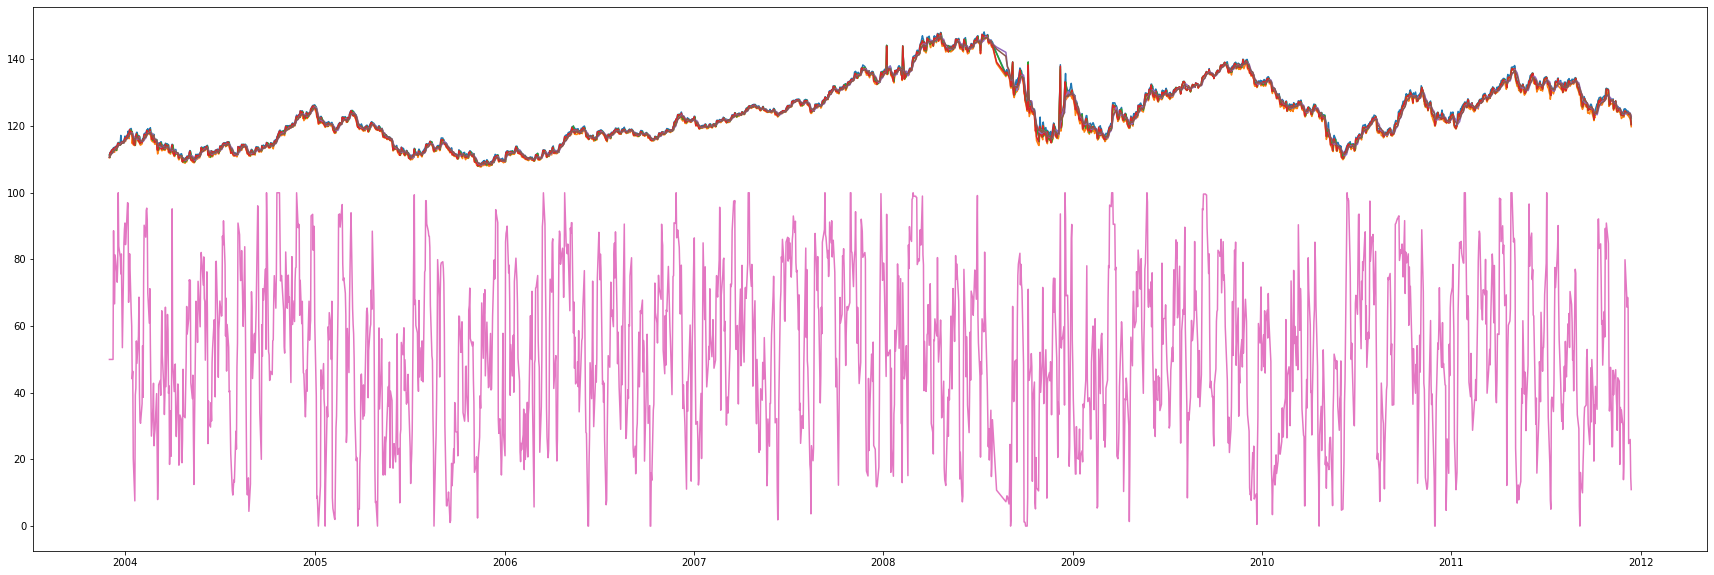

In [2296]:
fig = plt.subplots(figsize=(30,10))
plt.plot(df_train)

In [2297]:
# 分割後の詳細
print(f'単価抽出後のサマリ(df_train)\n{df_train.describe()}\n')
print(f'単価抽出後のサマリ(df_test)\n{df_test.describe()}\n')
# print(f'単価抽出後のサマリ(df_latest)\n{df_latest.describe()}\n')

単価抽出後のサマリ(df_train)
              High          Low         Open        Close        SMA01  \
count  2074.000000  2074.000000  2074.000000  2074.000000  2074.000000   
mean    124.078238   122.976785   123.526205   123.529490   123.515970   
std       9.210193     9.155624     9.188003     9.184970     9.141672   
min     108.520946   107.748581   107.993884   107.998923   108.316820   
25%     117.002707   115.876669   116.408944   116.427990   116.564712   
50%     123.242134   121.954434   122.590435   122.573382   122.595971   
75%     130.814157   129.426294   130.201913   130.179930   130.032894   
max     148.260942   146.834717   147.832063   147.888796   147.025652   

             EMA01        RSI01  
count  2074.000000  2074.000000  
mean    123.515317    52.328602  
std       9.124043    24.353755  
min     108.479788     0.000000  
25%     116.597826    35.047650  
50%     122.608192    52.130723  
75%     129.999944    71.108546  
max     146.934929   100.000000  

単価抽出後の

In [2298]:
df_train.head()

,High,Low,Open,Close,SMA01,EMA01,RSI01
Date,,,,,,,
2003-12-01,111.370639,110.482062,111.314347,110.676377,110.676377,110.676377,50.0
2003-12-02,112.008532,110.500532,110.639316,111.823016,110.946101,111.003988,50.0
2003-12-03,112.202814,111.712284,111.832477,112.137524,111.215825,111.327856,50.0
2003-12-04,112.332259,111.406851,112.110343,111.748717,111.485549,111.448102,50.0
2003-12-05,112.766375,111.609834,111.721723,112.729259,111.755273,111.814147,50.0


In [2299]:
# LSTMへの入力用に処理の関数

def data_maker(data):
  data_lstm_in=[]
  if len(data)==window_len:
    temp = data[:window_len].copy()
    temp = temp / temp.iloc[0] - 1
    data_lstm_in.append(temp)
  for i in range(len(data) - window_len): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)
      temp = data[i:(i + window_len)].copy() #windowの単位で行を取得。参照渡しでなく値渡し。
      temp = temp / temp.iloc[0] - 1
      data_lstm_in.append(temp)
  return data_lstm_in

In [2300]:
#関数の実行(Trainデータ)
train_lstm_in = data_maker(df_train)

In [2301]:
# 配列抜粋
print(f'train_lstm_in_配列数 : {len(train_lstm_in)}\n')
print(f'train_lstm_in[0]\n{train_lstm_in[0]}\n')
print(f'train_lstm_in[1]\n{train_lstm_in[1]}\n')
print(f'train_lstm_in[-1]\n{train_lstm_in[-1]}\n')

train_lstm_in_配列数 : 2068

train_lstm_in[0]
                High       Low      Open     Close     SMA01     EMA01  RSI01
Date                                                                         
2003-12-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
2003-12-02  0.005728  0.000167 -0.006064  0.010360  0.002437  0.002960    0.0
2003-12-03  0.007472  0.011135  0.004655  0.013202  0.004874  0.005886    0.0
2003-12-04  0.008634  0.008370  0.007151  0.009689  0.007311  0.006973    0.0
2003-12-05  0.012532  0.010208  0.003660  0.018549  0.009748  0.010280    0.0
2003-12-08  0.016610  0.017587  0.011134  0.021312  0.012185  0.013432    0.0

train_lstm_in[1]
                High       Low      Open     Close     SMA01     EMA01  \
Date                                                                     
2003-12-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2003-12-03  0.001735  0.010966  0.010784  0.002813  0.002431  0.002918   
2003-12-04  0.00289

In [2302]:
lstm_train_out = (df_train['Open'][window_len:].values / df_train['Open'][:-window_len].values)-1

In [2303]:
lstm_train_out

array([ 0.01554517,  0.02408164,  0.00835086, ..., -0.00716682,
       -0.01876104, -0.02665515])

In [2304]:
#関数の実行(Testデータ)
test_lstm_in = data_maker(df_test)

In [2305]:
# 配列抜粋(Testデータ)
print(f'test_lstm_in_配列数 : {len(test_lstm_in)}\n')
print(f'test_lstm_in[0]\n{test_lstm_in[0]}\n')
print(f'test_lstm_in[1]\n{test_lstm_in[1]}\n')
print(f'test_lstm_in[-1]\n{test_lstm_in[-1]}\n')

test_lstm_in_配列数 : 1240

test_lstm_in[0]
                High       Low      Open     Close     SMA01     EMA01  RSI01
Date                                                                         
2011-12-15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
2011-12-16  0.002682  0.003395  0.003284  0.003205  0.000673  0.000916    0.0
2011-12-19 -0.000613  0.001701  0.003741  0.003768  0.001346  0.001731    0.0
2011-12-20  0.006356  0.002625  0.001587  0.001522  0.002019  0.001671    0.0
2011-12-21  0.011123  0.005055  0.007748  0.007696  0.002693  0.003392    0.0
2011-12-22  0.005366  0.004675  0.003898  0.004003  0.003366  0.003567    0.0

test_lstm_in[1]
                High       Low      Open     Close     SMA01     EMA01  \
Date                                                                     
2011-12-16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2011-12-19 -0.003286 -0.001688  0.000456  0.000561  0.000673  0.000814   
2011-12-20  0.003664 -

In [2306]:
lstm_test_out = (df_test['Open'][window_len:].values / df_test['Open'][:-window_len].values)-1

In [2307]:
lstm_test_out

array([-0.00474374, -0.00597099, -0.00581912, ..., -0.00734906,
        0.0050652 ,  0.00605043])

In [2308]:
# #関数の実行(Latestデータ)
# latest_lstm_in = data_maker(df_latest)

In [2309]:
# # 配列抜粋
# print(f'latest_lstm_in_配列数 : {len(latest_lstm_in)}\n')
# print(f'latest_lstm_in\n{latest_lstm_in[0]}\n')
# #print(f'latest_lstm_in\n{latest_lstm_in[1]}\n')
# # print(f'latest_lstm_in\n{latest_lstm_in[-1]}\n')

## Numpy配列への変換

In [2310]:
# PandasのデータフレームからNumpy配列へ変換。リスト内包表記という記法がここでは使われている。
train_lstm_in = [np.array(train_lstm_input) for train_lstm_input in train_lstm_in]
train_lstm_in = np.array(train_lstm_in)

test_lstm_in = [np.array(test_lstm_input) for test_lstm_input in test_lstm_in]
test_lstm_in = np.array(test_lstm_in)

In [2311]:
# # 11/6 latestデータのnumpyへの置き換え
# latest_lstm_in = [np.array(test_lstm_input) for test_lstm_input in latest_lstm_in]
# latest_lstm_in = np.array(latest_lstm_in)

In [2312]:
print(f'train_lstm_in.shape[0] : {train_lstm_in.shape[0]}')
print(f'train_lstm_in.shape[1] : {train_lstm_in.shape[1]}')
print(f'train_lstm_in.shape[2] : {train_lstm_in.shape[2]}')

train_lstm_in.shape[0] : 2068
train_lstm_in.shape[1] : 6
train_lstm_in.shape[2] : 7


In [2313]:
train_lstm_in

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.72765665e-03,  1.67176363e-04, -6.06418905e-03, ...,
          2.43705088e-03,  2.96008189e-03,  0.00000000e+00],
        [ 7.47212212e-03,  1.11350437e-02,  4.65465663e-03, ...,
          4.87410175e-03,  5.88633786e-03,  0.00000000e+00],
        [ 8.63440602e-03,  8.37049556e-03,  7.15088317e-03, ...,
          7.31115263e-03,  6.97280396e-03,  0.00000000e+00],
        [ 1.25323492e-02,  1.02077388e-02,  3.65969257e-03, ...,
          9.74820350e-03,  1.02801473e-02,  0.00000000e+00],
        [ 1.66097984e-02,  1.75869534e-02,  1.11338103e-02, ...,
          1.21852544e-02,  1.34320443e-02,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.73453067e-03,  1.09660340e-02,  1.07842434e-02, ...,
          2.43112610e-03,  2.91761957e-03,  0.00000

## モデルの定義

In [2314]:
# モデルの定義
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2315]:
# LSTMのモデルを設定
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2]))) #バッチ数、時系列データ数、特徴量数
    model.add(Dropout(dropout)) 
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

## データの学習と予測

In [2316]:
np.random.seed(202)
 
# 初期モデルの構築
yen_model = build_model(train_lstm_in, output_size=1, neurons = 20)

# データを流してフィッティングさせる
yen_history = yen_model.fit(train_lstm_in, lstm_train_out, 
                            epochs=25, batch_size=1, verbose=2, shuffle=False)
# 11/5 epochs=50からepochs=10に変更
# 11/5 shuffle=TrueからFalseに変更

Epoch 1/25
2068/2068 - 4s - loss: nan
Epoch 2/25
2068/2068 - 3s - loss: nan
Epoch 3/25
2068/2068 - 3s - loss: nan
Epoch 4/25
2068/2068 - 3s - loss: nan
Epoch 5/25
2068/2068 - 3s - loss: nan
Epoch 6/25
2068/2068 - 3s - loss: nan
Epoch 7/25
2068/2068 - 3s - loss: nan
Epoch 8/25
2068/2068 - 3s - loss: nan
Epoch 9/25
2068/2068 - 3s - loss: nan
Epoch 10/25
2068/2068 - 3s - loss: nan
Epoch 11/25
2068/2068 - 3s - loss: nan
Epoch 12/25
2068/2068 - 3s - loss: nan
Epoch 13/25
2068/2068 - 3s - loss: nan
Epoch 14/25
2068/2068 - 3s - loss: nan
Epoch 15/25
2068/2068 - 3s - loss: nan
Epoch 16/25
2068/2068 - 3s - loss: nan
Epoch 17/25
2068/2068 - 3s - loss: nan
Epoch 18/25
2068/2068 - 3s - loss: nan
Epoch 19/25
2068/2068 - 3s - loss: nan
Epoch 20/25
2068/2068 - 3s - loss: nan
Epoch 21/25
2068/2068 - 3s - loss: nan
Epoch 22/25
2068/2068 - 3s - loss: nan
Epoch 23/25
2068/2068 - 3s - loss: nan
Epoch 24/25
2068/2068 - 3s - loss: nan
Epoch 25/25
2068/2068 - 3s - loss: nan


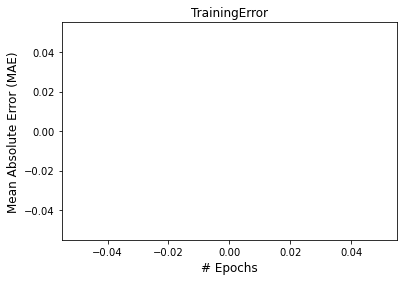

In [2317]:
# MAEをプロットしてみよう
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(yen_history.epoch, yen_history.history['loss'])
ax1.set_title('TrainingError')
 
if yen_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [2318]:
#作成したモデルを使用し予測。
train_pred = yen_model.predict(train_lstm_in)
# test_pred = yen_model.predict(X_test)

In [2319]:
train_pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [2320]:
np.transpose(train_pred)

array([[nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [2321]:
len(train_pred)

2068

In [2322]:
lstm_train_out

array([ 0.01554517,  0.02408164,  0.00835086, ..., -0.00716682,
       -0.01876104, -0.02665515])

In [2323]:
len(lstm_train_out)

2068

In [2324]:
# yen_model.score(train_pred, lstm_train_out) 

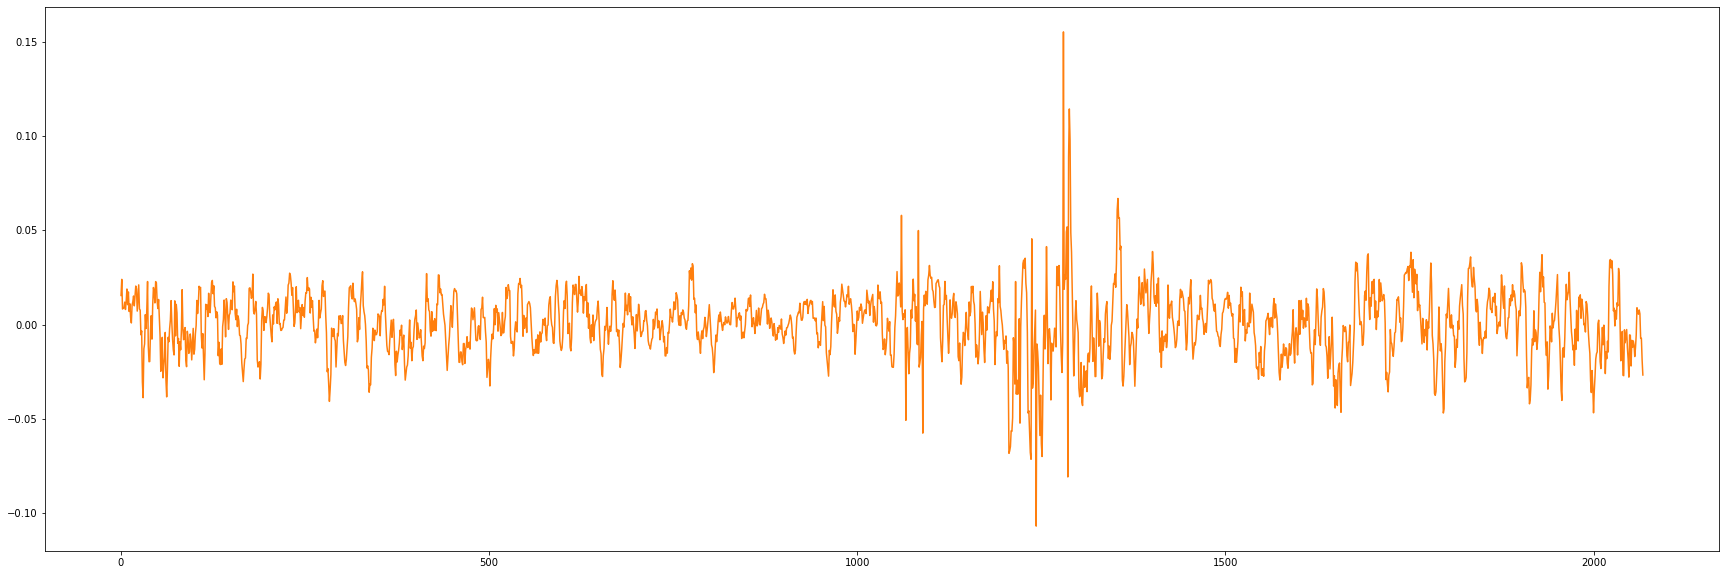

In [2325]:
fig,ax = plt.subplots(figsize=(30,10))
# plt.plot(train_pred)

ax.plot(train_pred)
ax.plot(lstm_train_out)
plt.show()

In [2326]:
# 配列には変化量が入っているので１００倍
np.transpose(train_pred+1)

array([[nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [2327]:
#予測データ(変化量)を単価に直したもの
Pred_Train_Price_Array=(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])[0]
(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])[0]

array([nan, nan, nan, ..., nan, nan, nan])

In [2328]:
#正解データ(変化量)を単価に直したもの
Actual_Train_Price_Array=(1+lstm_train_out)* df_train['Open'].values[:-window_len]
(1+lstm_train_out)* df_train['Open'].values[:-window_len]

array([113.04474801, 113.30369174, 112.76637495, ..., 123.68128955,
       121.78264081, 120.50861955])

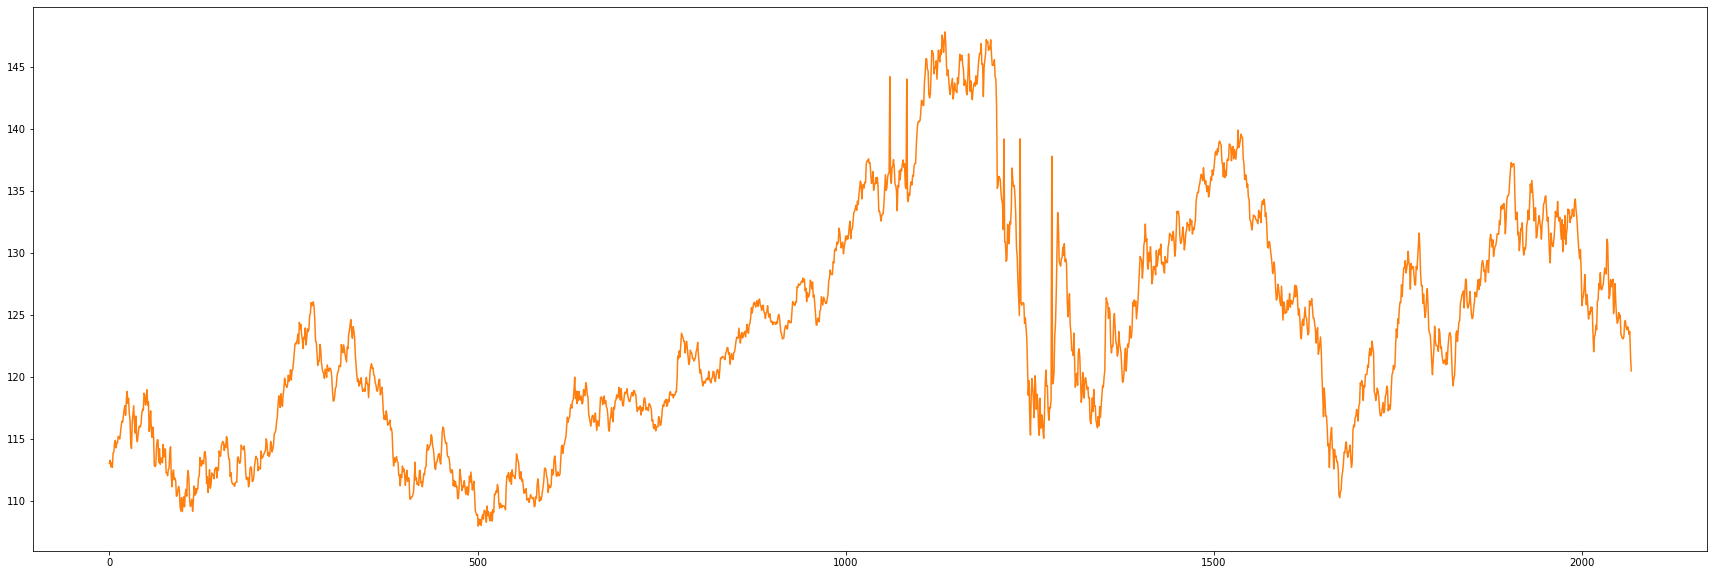

In [2329]:
fig,ax = plt.subplots(figsize=(30,10))

# 予測データと正解データの併記
ax.plot(Pred_Train_Price_Array)
ax.plot(Actual_Train_Price_Array)
plt.show()

In [2330]:
# #元のdf_trainデータ
# fig,ax = plt.subplots(figsize=(30,10))
# # plt.plot(train_pred)

# # ax.plot(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])
# ax.plot(df_train['Open'])
# # ax.set_xlim(datetime.datetime(2003,12,1), datetime.datetime(2011,12,14)) # 範囲指定
# plt.show()

## テストデータへの転用

In [2331]:
#作成したモデルを使用し予測。
test_pred = yen_model.predict(test_lstm_in)

In [2332]:
test_pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [2333]:
len(test_pred)

1240

In [2334]:
np.transpose(test_pred)

array([[nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [2335]:
len(lstm_test_out)

1240

In [2336]:
# 予測データ(変化量)を単価に直したもの
Pred_Price_Array=(np.transpose(test_pred+1)* df_test['Open'].values[:-window_len])[0]
(np.transpose(test_pred+1)* df_test['Open'].values[:-window_len])[0]

array([nan, nan, nan, ..., nan, nan, nan])

In [2337]:
typeInfo(Pred_Price_Array)

Pred_Price_Array は ndarray型
Pred_Price_Array の行数, 列数・・・(1240,)



In [2338]:
# 正解データ(変化量)を単価に直したもの
Actual_Price_Array=(1+lstm_test_out)* df_test['Open'].values[:-window_len]
(1+lstm_test_out)* df_test['Open'].values[:-window_len]

array([119.56311047, 119.80778545, 119.88076121, ..., 102.68650234,
       103.42938185, 103.64146143])

In [2339]:
typeInfo(Actual_Price_Array)

Actual_Price_Array は ndarray型
Actual_Price_Array の行数, 列数・・・(1240,)



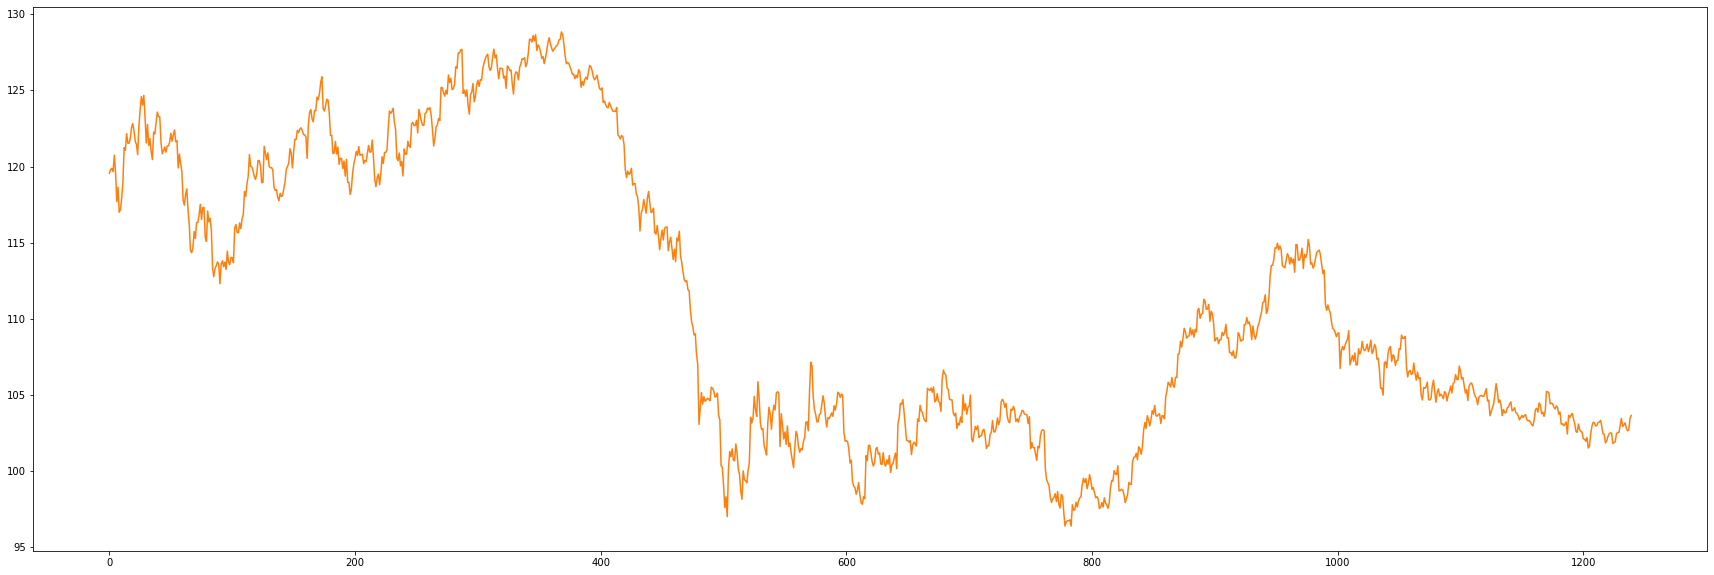

In [2340]:
fig,ax = plt.subplots(figsize=(30,10))
# fig,ax = plt.subplots()

# 正解データと予測データの併記
ax.plot(Pred_Price_Array)
ax.plot(Actual_Price_Array)
plt.show()

In [2341]:
# Actual_Price_Array[::12]

In [2342]:
len(Pred_Price_Array)

1240

In [2343]:
Pred_Price_Array_7=Pred_Price_Array[::6]
Pred_Price_Array_7

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [2344]:
len(Pred_Price_Array_7)

207

In [2345]:
df_test_Close_array=df_test['Close'].values
df_test_Close_array

array([120.13923079, 120.52431077, 120.59187233, ..., 102.68535554,
       103.43631774, 103.6212492 ])

In [2346]:
df_test_Close_array6=df_test_Close_array[5::6]
df_test_Close_array6

array([120.62017828, 119.61567551, 119.0108633 , 121.82273448,
       120.78713596, 123.21832687, 120.4583922 , 123.26759487,
       121.35922045, 122.40306705, 119.66364235, 116.19142771,
       116.30831242, 117.29647338, 115.77551663, 113.56660515,
       113.23295444, 113.6782521 , 115.91478586, 119.35484618,
       119.1549623 , 118.94046783, 119.92739379, 118.02985877,
       119.00167793, 119.91185695, 122.44843155, 120.55258363,
       123.69617581, 125.9017241 , 123.51448625, 120.80449224,
       120.36435515, 118.54718387, 121.31147414, 120.3173697 ,
       120.56829691, 119.55693543, 122.52141833, 122.4289912 ,
       119.39642847, 121.27329916, 122.2106263 , 123.52438837,
       122.43547499, 123.01513493, 124.74713475, 125.39992481,
       127.69893676, 123.46831679, 125.35913646, 126.78527325,
       126.52513862, 125.76307237, 125.13020784, 124.76564884,
       126.72448218, 127.43679523, 128.69565457, 127.20721602,
       128.07731241, 128.02591622, 127.28598088, 126.06

In [2347]:
len(df_test_Close_array6)

207

In [2348]:
Dif_Array=Pred_Price_Array_7-df_test_Close_array6
Dif_Array

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [2349]:
Df_Dif_Array = pd.Series(Dif_Array)
Df_Dif_Array

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
202   NaN
203   NaN
204   NaN
205   NaN
206   NaN
Length: 207, dtype: float64

In [2350]:
def p_judge(x):
    if x < 0:
        return 0
    else:
        return 1

In [2351]:
Df_sub=Df_Dif_Array.apply(p_judge)
Df_sub

0      1
1      1
2      1
3      1
4      1
      ..
202    1
203    1
204    1
205    1
206    1
Length: 207, dtype: int64

In [2352]:
Df_sub.describe()

count    207.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
dtype: float64

In [2353]:
df_submit[1]=Df_sub
df_submit

,Date,1
0,2011-12-22,1
1,2012-01-05,1
2,2012-01-19,1
3,2012-02-02,1
4,2012-02-16,1
...,...,...
202,2019-10-23,1
203,2019-11-07,1
204,2019-11-21,1
205,2019-12-05,1


In [2354]:
# 指定の様式（インデックスはDate、カラム名は「y」のみ）をお守りください。
df_submit = df_submit.set_index("Date") #indexにDateを指定する。
df_submit = df_submit.rename(columns={1: 'y'}) #カラム名「1」を「y」に変更する。
df_submit.to_csv('y_submit.csv') #投稿するファイルを書き出す。
df_submit #投稿する中身を確認する。

,y
Date,
2011-12-22,1
2012-01-05,1
2012-01-19,1
2012-02-02,1
2012-02-16,1
...,...
2019-10-23,1
2019-11-07,1
2019-11-21,1
